# Web Scraping - El Tiempo
Integrantes:

-Dayana Rodriguez

-Yulissa Restrepo

-Valentina Correa

-Nefrety Sánchez

In [1]:
#pip install webdriver-manager
#pip install selenium
#pip install beautifulsoup4

In [2]:
#from selenium.webdriver import Chrome
#from webdriver_manager.chrome import ChromeDriverManager
#webdriver = Chrome(ChromeDriverManager().install())

### Extracción de datos

In [3]:
import requests
import urllib.request
from bs4 import BeautifulSoup
from selenium.webdriver import Chrome
from webdriver_manager.chrome import ChromeDriverManager

class Scraping(object):
    """ Class used scraping resources"""

    def rss(self, url: str = '') -> list:
        article_list = []
        try:
            r = requests.get(url)
            soup = BeautifulSoup(r.content, features='xml')
            articles = soup.findAll('item')
            for a in articles:
                title = a.find('title').text
                link = a.find('link').text
                description = a.find('description').text
                category = a.find('category').text
                published = a.find('pubDate').text
                article = {
                    'title': title,
                    'link': link, 
                    'description': description,
                    'category' : category,
                    'published': published,
                    #'items': soup.findAll('item')
                    }
                article_list.append(article)
            return article_list
        except Exception as e:
            print('The scraping rss job failed. {0}'.format(e))
            return list()

    def web(self, url: str) -> list:
        try:
            data = []
            #webdriver = Chrome(ChromeDriverManager().install())
            webdriver = r"C:\Users\ASUS\.wdm\drivers\chromedriver\win32\86.0.4240.22\chromedriver.exe"
            driver = Chrome(webdriver)

            parser = 'html.parser'  # or 'lxml' (preferred) or 'html5lib', if installed
            resp = urllib.request.urlopen(url)
            soup = BeautifulSoup(resp, parser, from_encoding=resp.info().get_param('charset'))
            links = list()
            for row in soup.find_all('a', href=True):
                path = str(row['href'])
                if path.find('/') == 0 and path.count('/') >= 1:
                    if (url + path) not in links:
                        links.append(url + path)

            for page in links:
                driver.get(page)
                if str(driver.title) != 'Error404':
                    title = driver.title
                    text = driver.find_element_by_tag_name("body").text
                    if text != '':
                        print(driver.page_source)
                        row = [title, text]
                        print(row)
                        data.append(row)
            driver.close()
            return data
        except Exception as e:
            print('The scraping web job failed. {0}'.format(e))
            return list()
        
        
urls = ['https://www.eltiempo.com/rss/tecnosfera.xml',
       'https://www.eltiempo.com/rss/tecnosfera/novedades-tecnologia.xml',
       'https://www.eltiempo.com/rss/tecnosfera/apps.xml',
       'https://www.eltiempo.com/rss/tecnosfera/dispositivos.xml',
       'https://www.eltiempo.com/rss/tecnosfera/tutoriales-tecnologia.xml',
       'https://www.eltiempo.com/rss/tecnosfera/videojuegos.xml'
       ]

sc = Scraping()
articles = list()
for url in urls:
    articles.extend(sc.rss(url=url))

for art in articles:
    print(art, "\n")

{'title': 'Así nació Windows, el ‘rey’ del ‘software’, que cumplió 35 años', 'link': 'https://www.eltiempo.com/tecnosfera/novedades-tecnologia/asi-nacio-windows-el-rey-del-software-que-cumplio-35-anos-551940', 'description': 'En medio de un inicio complicado, Microsoft trascendió épocas.', 'category': 'Novedades Tecnología', 'published': 'Mon, 30 Nov 2020 15:59:10 +0000'} 

{'title': 'Apple vs Facebook: qué hay detrás esta gran rivalidad tecnológica', 'link': 'https://www.eltiempo.com/tecnosfera/novedades-tecnologia/apple-vs-facebook-que-hay-detras-de-la-larga-rivalidad-entre-las-dos-companias-tecnologicas-551446', 'description': 'Apple acusa a la red social Facebook de tratar a sus usuarios como un producto.&nbsp;', 'category': 'Novedades Tecnología', 'published': 'Mon, 30 Nov 2020 13:40:30 +0000'} 

{'title': 'Multan a Apple por mentir sobre resistencia al agua de su iPhone', 'link': 'https://www.eltiempo.com/tecnosfera/novedades-tecnologia/imponen-millonaria-multa-a-apple-por-mentir

### Exportarlo a un archivo

In [4]:
import pandas as pd

df = pd.DataFrame(articles)

writer = pd.ExcelWriter('web_scraping1.xlsx')
df.to_excel(writer, sheet_name='Sheet1')
writer.save()

### Importar DataSet

In [5]:
data_raw = pd.read_excel('web_scraping1.xlsx')
data_raw.rename(columns={'Unnamed: 0': 'num'}, inplace=True)
data_raw

,num,title,link,description,category,published
0,0,"Así nació Windows, el ‘rey’ del ‘software’, qu...",https://www.eltiempo.com/tecnosfera/novedades-...,"En medio de un inicio complicado, Microsoft tr...",Novedades Tecnología,"Mon, 30 Nov 2020 15:59:10 +0000"
1,1,Apple vs Facebook: qué hay detrás esta gran ri...,https://www.eltiempo.com/tecnosfera/novedades-...,Apple acusa a la red social Facebook de tratar...,Novedades Tecnología,"Mon, 30 Nov 2020 13:40:30 +0000"
2,2,Multan a Apple por mentir sobre resistencia al...,https://www.eltiempo.com/tecnosfera/novedades-...,Las autoridades italianas impusieron la suma d...,Novedades Tecnología,"Mon, 30 Nov 2020 13:35:34 +0000"
3,3,Reino Unido prohíbe la tecnología 5G de Huawei...,https://www.eltiempo.com/tecnosfera/novedades-...,El plan del gobierno británico es eliminar tod...,Novedades Tecnología,"Mon, 30 Nov 2020 12:49:43 +0000"
4,4,Paso a paso: así es el trámite para la cédula ...,https://www.eltiempo.com/tecnosfera/novedades-...,El procedimiento es fácil y dura pocos minutos...,Novedades Tecnología,"Mon, 30 Nov 2020 07:44:16 +0000"
5,5,Con estos 'tips' podrá consolidar su página we...,https://www.eltiempo.com/tecnosfera/tutoriales...,Una página bien consolidada puede ayudarle a t...,Tutoriales Tecnología,"Mon, 30 Nov 2020 04:33:22 +0000"
6,6,La herramienta Microsoft que monitorea cuánto ...,https://www.eltiempo.com/tecnosfera/novedades-...,Se trata de Productivity Score y mide acciones...,Novedades Tecnología,"Mon, 30 Nov 2020 02:10:31 +0000"
7,7,Así es la app de Google que le paga por hacer ...,https://www.eltiempo.com/tecnosfera/apps/task-...,Por el momento esta innovadora herramienta sol...,Apps,"Mon, 30 Nov 2020 02:09:35 +0000"
8,8,"Comienzan las filtraciones del iPhone 13, esto...",https://www.eltiempo.com/tecnosfera/dispositiv...,La principal novedad y más revolucionaria serí...,Dispositivos,"Mon, 30 Nov 2020 02:08:24 +0000"
9,9,Samsung presentó su nuevo celular plegable en ...,https://www.eltiempo.com/tecnosfera/dispositiv...,El Galaxy Z Fold2 ya está disponible en el paí...,Dispositivos,"Mon, 30 Nov 2020 02:07:42 +0000"


### Diagrama de frecuencias

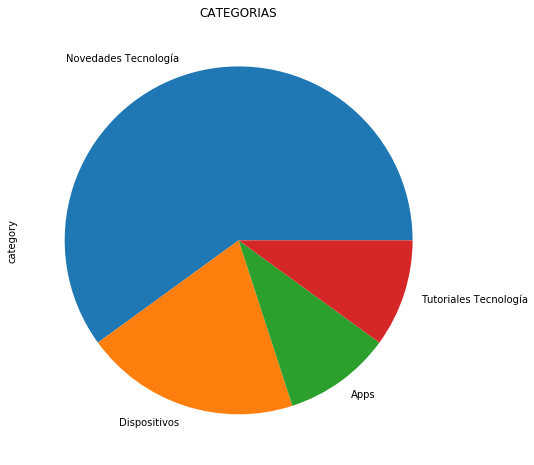

In [6]:
import matplotlib.pyplot as plt
data_raw['category'].value_counts().plot(kind='pie', title = 'CATEGORIAS', figsize=(8,8))

In [10]:
frecuency = data_raw.groupby("category", as_index=False)['num'].count()
frecuency.head(10)

,category,num
0,Apps,1
1,Dispositivos,2
2,Novedades Tecnología,6
3,Tutoriales Tecnología,1


### Diagrama de dispersión

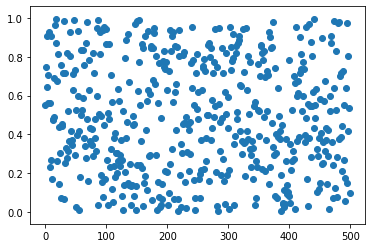

In [7]:
import numpy as np
dataframe = pd.DataFrame({'category': np.random.uniform(size=500)})
plt.scatter(dataframe.index, dataframe['category'])